In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

## Benchmark against Tim's website
- https://filedn.com/lU1GlyFhv3UuXg5E9dbnWFF/TJBHpages/hbpl.html
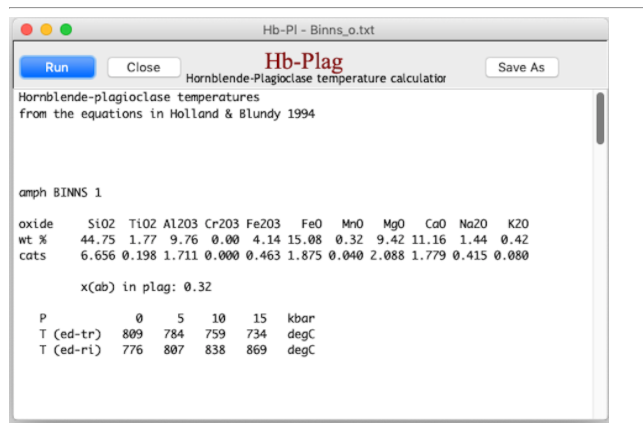

In [2]:
Amp_Tim=pd.DataFrame(data={'SiO2_Amp': 44.75,
                          'TiO2_Amp':1.77,
                          'Al2O3_Amp':9.76,
                          'Cr2O3_Amp':0,
                          'FeOt_Amp':4.14*0.8998+15.08,
                           'MnO_Amp': 0.32,
                           'MgO_Amp':9.42,
                           'CaO_Amp':11.16,
                           'Na2O_Amp':1.44,
                           'K2O_Amp':0.42,
                          }, index=[0])

In [3]:
Thermobar_Tim_0=pt.calculate_amp_plag_temp(amp_comps=Amp_Tim, XAb=0.32, XAn=1-0.32,
                                       equationT="T_HB1994_A", P=0)-273.1
Thermobar_Tim_0

0    809.708451
dtype: float64

In [4]:
Thermobar_Tim_15=pt.calculate_amp_plag_temp(amp_comps=Amp_Tim, XAb=0.32, XAn=1-0.32,
                                       equationT="T_HB1994_A", P=15)-273.1
Thermobar_Tim_15

0    734.379072
dtype: float64

In [5]:
## Benchmarking against the RIPG spreadsheet from Anderson, where specify An and Ab

In [6]:
Test_in=pt.import_excel('Holland_Blundy_RiMG069_Benchmark.xlsx', 
                        sheet_name='Thermobar_format')
Amps=Test_in['Amps']
Plags=Test_in['Plags']
Amps_input=Test_in['my_input']

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:355: UserWarning: You've got a column heading with a lower case _sp, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Sp)
  w.warn("You've got a column heading with a lower case _sp, this is okay if this column is for your"


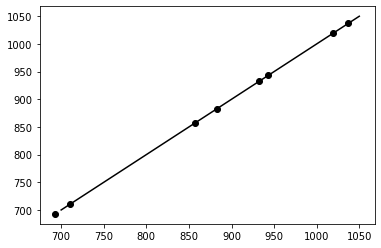

In [7]:
## 
Thermobar_A=pt.calculate_amp_plag_temp(amp_comps=Amps, XAb=Amps_input['XAb'], XAn=1-Amps_input['XAb'],
                                       equationT="T_HB1994_A", P=2)-273.15
plt.plot(Amps_input['Ta_Spreadsheet'],Thermobar_A, 'ok')
plt.plot([700, 1050], [700, 1050], '-k')

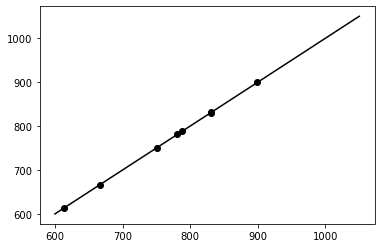

In [8]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Thermobar_B=pt.calculate_amp_plag_temp(amp_comps=Amps, XAb=Amps_input['XAb'], XAn=1-Amps_input['XAb'],
                                       equationT="T_HB1994_B", P=2)-273.15
plt.plot(Amps_input['Tb_spreadsheet'],Thermobar_B, 'ok')
plt.plot([600, 1050], [600, 1050], '-k')

## Using input plags and amps

In [9]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Thermobar_B_input=pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags,
                                       equationT="T_HB1994_B", P=5)-273.15
Thermobar_A_input=pt.calculate_amp_plag_temp(amp_comps=Amps, plag_comps=Plags,
                                       equationT="T_HB1994_A", P=5)-273.15

In [10]:
## Benchmark against RIPG spreadsheet from Anderson, where specify An and Ab
Plags.head()
An=pt.calculate_cat_fractions_plagioclase(plag_comps=Plags).An_Plag
Ab=pt.calculate_cat_fractions_plagioclase(plag_comps=Plags).Ab_Plag

Thermobar_B_input_An=pt.calculate_amp_plag_temp(amp_comps=Amps, XAn=An, XAb=Ab,
                                       equationT="T_HB1994_B", P=5)-273.15
Thermobar_A_input_An=pt.calculate_amp_plag_temp(amp_comps=Amps, XAn=An, XAb=Ab,
                                       equationT="T_HB1994_A", P=5)-273.15

### First, show these are the same (input plag, input An)

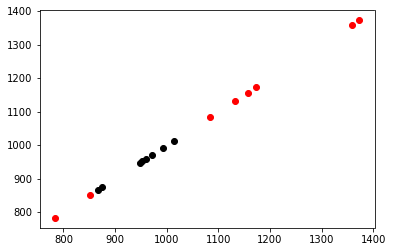

In [11]:
plt.plot(Thermobar_B_input_An, Thermobar_B_input, 'ok')
plt.plot(Thermobar_A_input_An, Thermobar_A_input, 'or')


## Compare to spreadsheet
- Original spreadsheet does Xan -Xab wrong

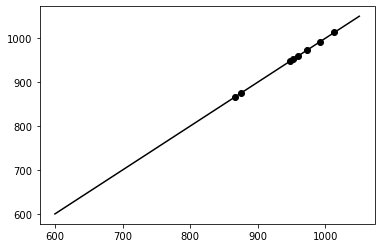

In [12]:
plt.plot(Amps_input['Tb_spreadsheet2'],Thermobar_B_input, 'ok')
plt.plot([600, 1050], [600, 1050], '-k')

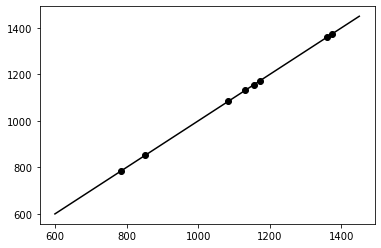

In [14]:
plt.plot(Amps_input['Ta_spreadsheet2'], Thermobar_A_input, 'ok')
plt.plot([600, 1450], [600, 1450], '-k')